### *“Nothing in life that’s worth anything is easy.”* -Barack Obama

----

YOUR NAME HERE: Brandon Rank


----

# Lab K: Scatter Plots!

### REMEMBER:  EVERY PLOT NEEDS A TITLE AND X/Y AXES LABELS EVEN IF I DO NOT SPECIFY WHAT THEY SHOULD BE.

---

In [ ]:
import numpy as np   #for processing arrays
import pandas as pd  #for processing dataframes
import sqlite3 as sql  #SQL!
import matplotlib.pyplot as plt #picture making!
plt.style.use('fivethirtyeight') #A helpful style package

### Setting up our data ###

The table `actors` contains data on Hollywood actors, both male and female. The columns are:

| ** Column **        | Contents |
|---------------------|----------|
|`actor`              | Name of actor |
|`total_gross`        | Total gross domestic box office receipt, in millions of dollars, of all of the actor's movies |
| `number_of_movies`  | The number of movies the actor has been in |
| `average_per_movie` | Total gross divided by number of movies |
| `no1_movie`          | The highest grossing movie the actor has been in |
| `gross`             | Gross domestic box office receipt, in millions of dollars, of the actor's `#1 Movie` |

In the calculation of the gross receipt, the data tabulators did not include movies where an actor had a cameo role or a speaking role that did not involve much screen time.

The table has 50 rows, corresponding to the 50 top grossing actors. The table is already sorted by `Total Gross`, so it is easy to see that Harrison Ford is the highest grossing actor. In total, his movies have brought in more money at domestic box office than the movies of any other actor.

In [ ]:
try:
    #Read in the needed csvs and create the DB
    actors = pd.read_csv("actors.csv")
    conn = sql.connect('actors.db')
    actors.to_sql('actors', conn,  index = False)

except:
    print("Issue during DB creation/connection")

Issue during DB creation/connection


In [ ]:
sql_statement = """SELECT * FROM actors"""

actors = pd.read_sql_query(sql_statement, conn)
actors

,actor,total_gross,number_of_movies,average_per_movie,no1_movie,gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
5,Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
6,Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
7,Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
8,Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
9,Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


### Scatter Plots ###
A *scatter plot* displays the relation between two numerical variables. You saw an example of a scatter plot in an early section where we looked at the number of periods and number of characters in two classic novels.

Recall that we have imported the matplotlib plotting library as ```plt```.  We rely on ```plt``` to make the visualizations.  The method ```scatter``` from the ```plt``` package draws a scatter plot consisting of one point for each row of the table. Its first argument is column to be plotted on the horizontal axis, and its second argument is the column on the vertical.

Text(0, 0.5, 'Total Gross')

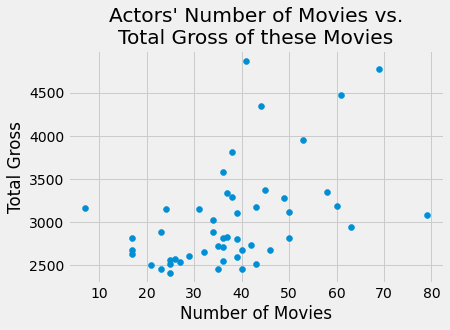

In [ ]:
#Example of making a scatter plot
plt.scatter(actors['number_of_movies'], actors['total_gross'])
plt.title("Actors' Number of Movies vs.\nTotal Gross of these Movies")
plt.xlabel('Number of Movies')
plt.ylabel('Total Gross')

The plot contains 50 points, one point for each actor in the table. You can see that it slopes upwards, in general. The more movies an actor has been in, the more the total gross of all of those movies – in general.

Formally, we say that the plot shows an *association* between the variables, and that the association is *positive*: high values of one variable tend to be associated with high values of the other, and low values of one with low values of the other, in general.

Of course there is some variability. Some actors have high numbers of movies but middling total gross receipts. Others have middling numbers of movies but high receipts. **That the association is positive is simply a statement about the broad general trend.**

### The Correlation Coefficient (r) ###

One way to quantify association is to use (Pearson's) correlation coefficient.  To calculate the coefficient by hand, you'd have to plug all the (x,y) points from the scatter plot above into a formula.  This forumula always generates a number between -1 and +1.

We'll never calculate the correlation coefficient by hand, but instead we'll just have Python calculate it for us, as shown in the below cell.  Notice that we again pass in the 2 columns we're interested in comparing.

In [ ]:
corr_df = actors.corr()
corr_df

,total_gross,number_of_movies,average_per_movie,gross
total_gross,1.000000,0.474609,0.014250,0.385570
number_of_movies,0.474609,1.000000,-0.627345,-0.158148
average_per_movie,0.014250,-0.627345,1.000000,0.474866
gross,0.385570,-0.158148,0.474866,1.000000


As you can see, the ``corr()`` method returns a dataframe where all entries are in the interval \[-1, 1\].  The returned number is the correlation coefficient between 2 variables in the data.  

The table shows us that the correlation coefficient between the `Total Gross` and `Number of Movies` is 0.474609.

As another example, the correlation coefficient between the `Total Gross` and `Average Per Movie` is 0.014250.   

The diagonals contain a value of 1.00000 because any variable is deeply correlated with itself, ie, always matches itself.

Notice that 0.474609 and 0.014250 both appear twice.  This is because whether you find the association between `Total Gross` and the `Number of Movies` or instead between the `Number of Movies` and `Total Gross`, you should get the same value.  Because of this commutativity, the correlation matrix is always *symmetric* down the diagonal, ie, corresponding entries are the same when you fold the matrix diagonally.

If you wanted to get the correlation coefficient from the table without hardcoding, you could do the following.  Here we use 2 sets of hard brackets to select the ``Total Gross`` column and then the desired row, ``Number of Movies``.

In [ ]:
r = corr_df["total_gross"]["number_of_movies"]  #We are choosing the column "Total Gross"
                                                #and then the row with label "Number of movies"
r

0.47460879537420464

And thanks to the symmetry of the correlation table, you could have swapped the order, like below.

In [ ]:
r = corr_df["number_of_movies"]["total_gross"]  #Now we are choosing the column "Number of movies"
                                                #and then the row with label "Total Gross"
r

0.47460879537420464

How do you interpret 0.474609?  Well, this number indicates that the `total_gross` and the `number_of_movies` have a positive linear association of *moderate* strength.  Why "moderate"?  Because  0.474609 is somewhere in the middle of 0 and 1, so not super weak and not super strong. Here are some guidelines for how to interpret the correlation coefficient values. (This chart is pretty typical in an intro stats class and more can be read about the correlation coefficient [here](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/).)

* Exactly –1: A perfect downhill (negative) linear relationship
* –0.70: A strong downhill (negative) linear relationship
* –0.50: A moderate downhill (negative) relationship
* –0.30: A weak downhill (negative) linear relationship
* 0: No linear relationship (But remember the parabola example - "r=0" might not mean "no relationship at all"!)
* +0.30: A weak uphill (positive) linear relationship
* +0.50: A moderate uphill (positive) relationship
* +0.70: A strong uphill (positive) linear relationship
* Exactly +1: A perfect uphill (positive) linear relationship

Now that we have explored how the number of movies is related to the *total* gross receipt, let's turn our attention to how it is related to the *average* gross receipt per movie.

---

# **Question 1**

Below, create a scatter plot of the ``number_of_movies`` for each actor vs. ``average_per_movie`` (average gross per movie).  Label each axis and call the graph "Actors' Number of Movies vs.\nAverage Gross Per Movie".  Notice that the `\n` in the middle just splits the title into two lines.

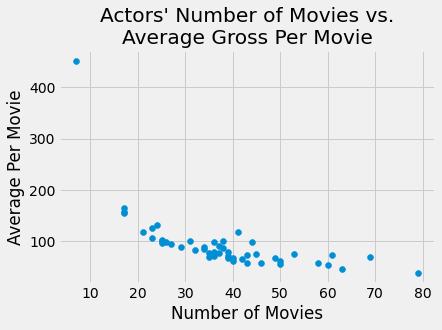

In [ ]:
#Make your scatter plot here, per the specifications.
plt.scatter(actors["number_of_movies"], actors["average_per_movie"])
plt.title("Actors' Number of Movies vs.\nAverage Gross Per Movie")
plt.xlabel("Number of Movies")
plt.ylabel("Average Per Movie");

This is a markedly different picture than before and shows a *negative* association. In general, the more movies an actor has been in, the *less* the average receipt per movie.

The correlation is stored in the corr_df table generated above.  Set the variable equal to the correct correlation *without hardcoding*, ie, use the double bracket notation explained above to store the value of the coefficient into the variable r.

In [ ]:
r = corr_df["number_of_movies"]["average_per_movie"]
r

-0.62734549496351

Using our guidelines above, does this show a weak/strong/moderate relationship between the variables?  Explain.

This correlation coefficient of -0.62 shows us that there is a moderate to strong negative relationship between the Number of Movies and the Average Per Movie. In general, it leans more towards a strong negative relationship. I chose to describe this as a moderate to strong negative relationship because the r value of -0.62 falls in between what we typically define as moderate, at 0.5, and strong, at 0.7.

---

In Question 1, notice that one of the points is quite high and off to the left of the plot. It corresponds to one actor who has a low number of movies and high average per movie. This point is an *outlier*. It lies outside the general range of the data. Indeed, it is quite far from all the other points in the plot.

We now will examine the negative association further by looking at points on the right/left ends of the plot.

Let's zoom in on the main body of the plot by just looking at the portion that doesn't have that left outlier on the left.

In [ ]:
 #Get all rows of our table where the number of movies is above 10
sql_statement = """SELECT *
                   FROM actors
                   WHERE number_of_movies > 10"""

actors_no_outlier = pd.read_sql_query(sql_statement, conn)
actors_no_outlier

,actor,total_gross,number_of_movies,average_per_movie,no1_movie,gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
5,Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
6,Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
7,Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
8,Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
9,Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


And now we build the scatter plot!

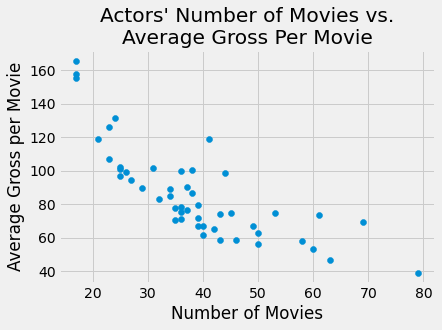

In [ ]:
plt.scatter(actors_no_outlier['number_of_movies'], actors_no_outlier['average_per_movie'])
plt.title("Actors' Number of Movies vs.\nAverage Gross Per Movie")
plt.xlabel('Number of Movies')
plt.ylabel('Average Gross per Movie');

The negative association is still clearly visible.  Let's check out the correlation coefficient now that this one outlier has been removed.

In [ ]:
corr_matrix = actors_no_outlier.corr()
corr_matrix

,total_gross,number_of_movies,average_per_movie,gross
total_gross,1.000000,0.510861,-0.028893,0.406809
number_of_movies,0.510861,1.000000,-0.784604,-0.037520
average_per_movie,-0.028893,-0.784604,1.000000,0.287426
gross,0.406809,-0.037520,0.287426,1.000000


So r went from about -0.6273 to about -0.7846.  

From this, you should learn that **outliers can deeply affect the correlation coefficient**!  Without that outlier, we have a strong negative linear relationship amongst the points.

---

# **Question 2**

Let's identify the actors corresponding to the points that lie on the right hand side of the plot where the number of movies is large.

Generate a table with all actors who made more than 60 movies.

In [ ]:
#Get all rows with actors who made more than 60 movies.
sql_statement = """SELECT *
                   FROM actors
                   WHERE number_of_movies > 60
                   ORDER BY number_of_movies DESC;"""

actors_more_than_60_movies = pd.read_sql_query(sql_statement, conn)
actors_more_than_60_movies

,actor,total_gross,number_of_movies,average_per_movie,no1_movie,gross
0,Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5
3,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9


Who had the highest number of movies? (Maybe you want to change your query above so that the results are SORTED.)  Write the name of this person below.

Robert DeNiro

---

From the scatter plot, you should have seen that the great actor Robert DeNiro has the highest number of movies and the lowest average receipt per movie. Other fine actors are at points that are not very far away, but DeNiro's is at the extreme right end.

To understand the negative association, note that the more movies an actor is in, the more variable those movies might be, in terms of style, genre, and box office draw. For example, an actor might be in some high-grossing action movies or comedies (such as Meet the Fockers), and also in a large number of smaller films that may be excellent but don't draw large crowds. Thus the actor's value of average receipts per movie might be relatively low.

---

# **Question 3**

To approach this argument from a different direction, let us now take a look at the outlier in your scatter plot from Question 1.  Generate a sql statement that returns exactly one row, the row correspoding to that outlier.

In [ ]:
#Find the outlier's information!
sql_statement = """SELECT *
                   FROM actors
                   WHERE number_of_movies < 10
                   LIMIT 1"""

actors_less_than_10_movies = pd.read_sql_query(sql_statement, conn)
actors_less_than_10_movies

,actor,total_gross,number_of_movies,average_per_movie,no1_movie,gross
0,Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


Who had the highest average per movie? Write your answer below.

Anthony Daniels had the highest average per movie, with an average of 451.8.

# **- - - - - - - - - - - - - - - - - - - - - - - - - - -**

Your answer should have been Anthony Daniels.  Anthony Daniels might not have the stature of Robert DeNiro, but his 7 movies had an astonishingly high average receipt of nearly $452$ million dollars per movie.

What were these movies? You might know about the droid C-3PO in Star Wars:

![C-3PO](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/C-3PO_droid.png)

That's [Anthony Daniels](https://en.wikipedia.org/wiki/Anthony_Daniels) inside the metallic suit. He plays C-3PO.

Mr. Daniels' entire filmography (apart from cameos) consists of movies in the high-grossing Star Wars franchise. That explains both his high average receipt and his low number of movies.

Variables such as genre and production budget have an effect on the association between the number of movies and the average receipt per movie. This example is a reminder that studying the association between two variables often involves understanding other related variables as well.

---

Let's close the actors database connection as we are moving on to another  data set.

In [ ]:
conn.close()

---

###  Time to stop the games...

Recall the GameStop example from last lab.  Let's read in the data again.

In [ ]:
try:
    #Read in the needed csvs and create the DB
    conn = sql.connect('game_stop.db')
except:
    print("Issue during DB creation/connection")

In [ ]:
sql_statement = """SELECT * FROM game_stop """

game_stop = pd.read_sql_query(sql_statement, conn)  #Call the results game_stop
game_stop

,id,date,open,high,low,close,adj_close,volume
0,1,2020-09-29,10.000000,10.650000,9.930000,10.350000,10.350000,5237600.0
1,2,2020-09-30,10.250000,10.760000,10.060000,10.200000,10.200000,6079000.0
2,3,2020-10-01,10.090000,10.250000,9.690000,9.770000,9.770000,4554100.0
3,4,2020-10-02,9.380000,9.780000,9.300000,9.390000,9.390000,4340500.0
4,5,2020-10-05,9.440000,9.590000,9.250000,9.460000,9.460000,2805000.0
...,...,...,...,...,...,...,...,...
248,249,2021-09-23,192.330002,195.750000,190.600006,191.240005,191.240005,1682300.0
249,250,2021-09-24,191.000000,191.720001,184.110001,185.160004,185.160004,1679900.0
250,251,2021-09-27,185.919998,192.050003,185.869995,189.479996,189.479996,1470100.0
251,252,2021-09-28,188.000000,190.809998,178.000000,178.600006,178.600006,1770500.0


---

# **Question 4**

A) Create a scatter plot for the Closing Values vs. Opening Values of each day in our data set.  

Be sure, as always, to ive a tile and label your x axis and y axis.

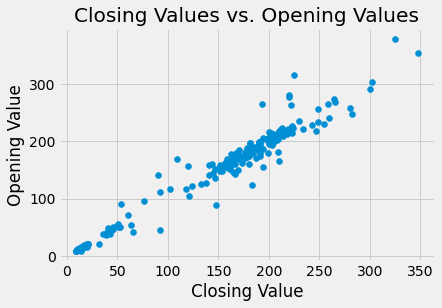

In [ ]:
plt.scatter(game_stop["close"], game_stop["open"])
plt.title("Closing Values vs. Opening Values")
plt.xlabel("Closing Value")
plt.ylabel("Opening Value");

B) Now without hardcoding. find the correlation coefficient of the closing versus opening prices.

In [ ]:
#may need code here

corr_close_vs_open = game_stop.corr()["close"]["open"]
corr_close_vs_open

0.9842078904745033

C)  The scatter plot and correlation coefficient suggest a very strong correlation.  Why does that make sense, given the context of this data?

This makes sense for this data as it is for stock data on game stop. Typically, for stock prices, if the opening price for a company's stock is high, the closing price will follow that same trend, often increasing slightly during the day. With strong performing companies, we expect that they will have positve stock performance, resulting in this positive relationship. In addition, during the time frame the data is from, there was a rally amongst individual investors buying Game Stop stock, which resulted in the stock price being driven higher and higher each day. Demand each day for the Game Stop stock was consistently high, resulting in the price of the stock increasing rather than decreasing, despite the companies poor performance financially for years.

---

### Using scatter plots to plot special points.

Scatter plots draw dots.  This means we can use the ``plt.scatter`` function to draw dots on other graphs.

So we'll use ``plt.scatter(x, y, color = "red")`` to highlight points on other graphs.  In specific, this code would draw an orange dot at the point $(x,y)$.  Let's get practice with this now by putting a red dot on a line graph.

To get us started, recall our line graph of the GameStop data. Run the cell below. Notice how ugly it is.

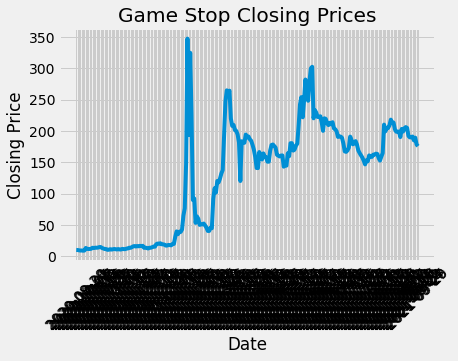

In [ ]:
plt.plot(game_stop["date"], game_stop['close'])
plt.title('Number of Movies Created 2000-2020')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Game Stop Closing Prices")
plt.xticks(rotation=45);

Essentially, python is trying to label every single x tick, so we're going to change the frequency of the x ticks so that one tick every 30 days (so about once a month) is shown.

We discussed how to create ranges in class.

Recall that ``np.arange(0, 210, 30)`` will generate the list 0, 30, 60, 90, 120, 150, 180.  The value 210 is not included because the second number is the "almost end", ie, we never reach it.  

We will generate a list starting at 0, ending at, and skipping by 30 by using this line.  Add it where indicated below.

* ```np.arange(0, len(game_stop), 30)  #The len of the game_stop table is always 1 past the last row index.```

    
    

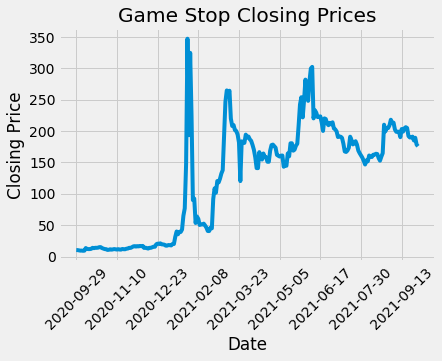

In [ ]:
plt.plot(game_stop["date"], game_stop['close'])
plt.title('Number of Movies Created 2000-2020')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Game Stop Closing Prices")
plt.xticks(np.arange(0, len(game_stop), 30), rotation=45);

How pretty! Don't you agree?  Okay, let's plot a red point on this graph and make it even better.

---

# **Question 7**

We'll label the date of the highest closing price of the GameStop stock with a red dot on our line graph.


A) Write a SQL Query to retrieve exactly one row - The row that corresponds to the peak/highest closing price.     

In [ ]:
sql_statement = """SELECT *
                   FROM game_stop
                   ORDER BY close DESC
                   LIMIT 1;"""

game_stop_peak = pd.read_sql_query(sql_statement, conn)  #Call the results game_stop
game_stop_peak

,id,date,open,high,low,close,adj_close,volume
0,83,2021-01-27,354.829987,380.0,249.0,347.51001,347.51001,93396700.0


B) Now use Python and the double bracket notation to set the peak date/closing price variables below.

In [ ]:
peak_date = game_stop_peak["date"][0]
peak_closing_price = game_stop_peak["close"][0]
peak_date, peak_closing_price

(0    2021-01-27
 Name: date, dtype: object, 0    347.51001
 Name: close, dtype: float64)

C) Now we will plot a red dot for the peak closing price.!

Use the ``peak_date``, ``peak_closing_price`` variables within the ``plt.scatter(..., ..., color = "red")`` function to plot a red point for this peak.

Likely, your red dot will appear BEHIND the blue curve, so use the ``zorder`` parameter to correct this.  This parameter defines the order of which graphs should be drawn first:

* add a parameter ``zorder=1`` to the ``plt.plot(...)`` line of code
* and a parameter ``zorder=2`` to the ``plt.scatter(...)`` line of code

Thus, the red dot is drawn 2nd and thus appears on top of the blue line graph.

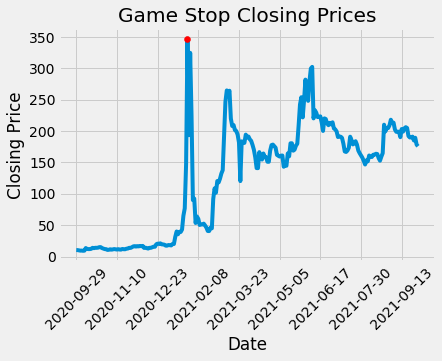

In [ ]:

#The code to create the line graph
plt.plot(game_stop["date"], game_stop['close'], zorder = 1)

#Add code to plot the peak date/closing price here
plt.scatter(peak_date,peak_closing_price, color = "red", zorder=2)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Game Stop Closing Prices")
plt.xticks(np.arange(0, len(game_stop), 30))  #To change the frequency of the tick marks
plt.xticks(rotation=45);

---

Let's close the actors  game stop connection as we are moving on to another  data set.

In [ ]:
conn.close()

---

###  Transforming logarithmic or exponential data

In 2007, a university study was published investigating the crash risk of alcohol impaired driving. Data from 2,871 crashes were used to measure the association of a person’s blood alcohol level (BAC) with the risk of being in an accident. The alcohol data frame below shows results from the [study](https://opentextbc.ca/algebratrigonometryopenstax/chapter/fitting-exponential-models-to-data/#return-footnote-74-1).

The relative risk is a measure of how many times more likely a person is to crash. So, for example, a person with a BAC of 0.09 is 3.54 times as likely to crash as a person who has not been drinking alcohol.

In [ ]:
#Don't let this code bother you.  Instead of using a csv, I'm hard coding data cause it was simpler for this little example.
alcohol = pd.DataFrame({"BAC" : [0,0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.21],
"risk": [1,1.03,1.06,1.38,2.09,3.54,6.41,12.6,22.1,39.05,65.32,99.78]})

alcohol

,BAC,risk
0,0.00,1.00
1,0.01,1.03
2,0.03,1.06
3,0.05,1.38
4,0.07,2.09
5,0.09,3.54
6,0.11,6.41
7,0.13,12.60
8,0.15,22.10
9,0.17,39.05


---

# **Question 5**

Create a scatter plot of this data with the BAC on the x axis and the relative risk on the y axis.

Of course, give an appropriate title and include labels.

Text(0, 0.5, 'Relative Risk')

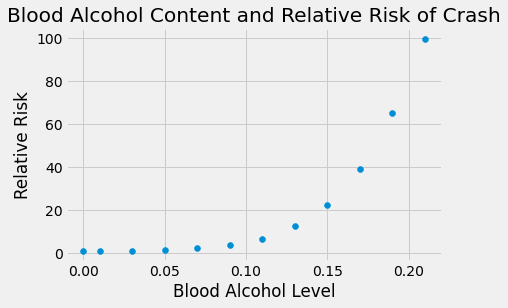

In [ ]:
plt.scatter(alcohol["BAC"],alcohol["risk"])
plt.title("Blood Alcohol Content and Relative Risk of Crash")
plt.xlabel("Blood Alcohol Level")
plt.ylabel("Relative Risk")

---

You should should notice that the risk is rising exponentially, ie, risk appears to be rising like $$e ^ {BAC}$$.

If you remember your logarithmic/exponential rules, another way to denote this same relationship is:

$$risk \approx e ^ {BAC}  \,\,\,\, \implies \,\,\,\, BAC \approx \log risk$$

This suggests that BAC should increase as log risk increases, and thus show a positive linear relationship.  Let's transform our data and see this.

---

# **Question 6**

A) We can use ``np.log(array)`` to take the log of each value in an array in an elementwise fashion.  Essentially, we just need to pass a column in to ``np.log(XXX)``.

Use this method to craete a column "log_rish" in the ``alchohol`` dataframe that contains the log of each Risk value.

In [ ]:
alcohol["log_risk"] = np.log(alcohol["risk"])  #Adding a new table with log_risk values that are just the log of the risk values

B) Now create a scatter plot of the BAC versus "Log Risk" data.

Make the title "Risk from Blood Alchohol (BAC)" with an x label of "BAC" and a y label of "Risk (log)"

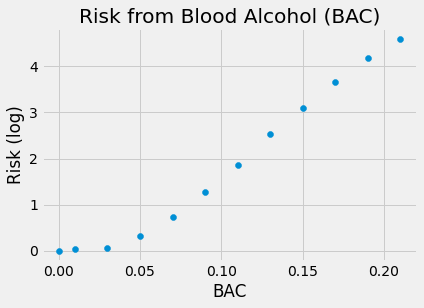

In [ ]:
plt.scatter(alcohol["BAC"],alcohol["log_risk"])
plt.title("Risk from Blood Alcohol (BAC)")
plt.xlabel("BAC")
plt.ylabel("Risk (log)");

Since we deduced that $BAC \approx \log Risk$, the plot points should look more linear than the plot from Question 5.

C) Find the table of correlation coefficients for the ``alchohol`` dataframe.

In [ ]:
corr_df = alcohol.corr()
corr_df

,BAC,risk,log_risk
BAC,1.000000,0.831378,0.985505
risk,0.831378,1.000000,0.870858
log_risk,0.985505,0.870858,1.000000


Take note of the correlation between BAC vs. Risk  (0.831378) and also Bac vs. Log Risk (0.985505).  Sinnce the latter is closer to 1, it does appear that the log of the risk has a high linear relationship with the BAC.

---

You're done! Yay!  Hopefully you now feel confident in creating scatter plots.